In [1]:
import sys
sys.path.append("../") 

from copy import deepcopy

import numpy as np
import scipy.linalg as slin
from scipy.stats import kde
import scipy.stats as ss
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import LISA as l

import Wavelet as wv
import Glitch as gl
import Burst as bu

import Burst_MCMC as bumc
import MCMC_tools as mct


# constants
mHz = 1.0e-3
Hour = 3600.

In [2]:
Week = 3600.*24.*7.
dt   = 15.
Tobs = 2**np.ceil(np.log2(Week/dt))*dt
orb = l.Orbit(Tobs, dt=dt)
#t = np.arange(0.0, orb.Tobs, orb.dt) # set up the time of this orbit

A    = 2.0e-21
f0   = 5.0*mHz
tau  = 1.0*Hour
t0   = 0.5*orb.Tobs
phi0 = 1.0

theta = np.pi*0.23
phi   = np.pi*0.2
psi   = np.pi*0.2
ellip = 0.3

# Non-Dimensional parameters
paramsND = np.array([np.log(A), f0/mHz, t0/Week, tau/Week, phi0, \
                     np.cos(theta), phi, psi, ellip])

gw = bu.Burst(paramsND, orb)
gw.construct_detector_tensor()
gw.calculate_strain()
gw.TDI = gw.construct_TDI(orb)

In [3]:
# PT = 1
# X_flag = None
# flag = bumc.Flag(PT, X_flag)

# gw.calc_snr(X_flag)
# gw.adjust_snr(20, X_flag)
# A = np.exp(gw.paramsND[0])

# modelX0 = bumc.Model(gw, orb)
# modelX0.get_loglkl(gw.TDI, X_flag)
# print(modelX0.loglkl)

# seed = 1
# N_MCMC = 2*10**4
# N_Burn = 0*10**0
# lkl, chain, max_model, T_chain = bumc.Burst_MCMC(TDI_data=gw.TDI, Orbit=orb, modelX0=modelX0, \
#                                                     seed=seed, N=N_MCMC, N_Burn=N_Burn, Flag=flag)

# FF = (max_model.loglkl + 0.5*max_model.Burst.SNR**2)/max_model.Burst.SNR/modelX0.Burst.SNR
# print("FF......... {}".format(FF))

In [ ]:
PT = 1
X_flag = None
flag = bumc.Flag(PT, X_flag)

random_start = 0
if (random_start==1):
    continue
    
gw.calc_snr(X_flag)
gw.adjust_snr(20, X_flag)
A = np.exp(gw.paramsND[0])

modelX0 = bumc.Model(gw, orb)
modelX0.get_loglkl(gw.TDI, X_flag)
print(modelX0.loglkl)

seed = 1
N_MCMC = 200
N_Burn = 0*10**0

lkl, chain, max_model = bumc.Burst_MCMC2(TDI_data=gw.TDI, Orbit=orb, modelX0=modelX0, \
                                        seed=seed, N=N_MCMC, N_Burn=N_Burn, Flag=flag, model_true=deepcopy(model_X0))

FF = (max_model.loglkl + 0.5*max_model.Burst.SNR**2)/max_model.Burst.SNR/modelX0.Burst.SNR
print("FF......... {}".format(FF))

200.00000000000006
Num of Temps....... 12


  2%|▏         | 4/200 [00:40<33:26, 10.24s/it]../LISA.py:69: RuntimeWarning: divide by zero encountered in true_divide
  red = 16.0*( (2.0e-5/f)**10.0 + (1.0e-4/f)**2. )
../LISA.py:80: RuntimeWarning: divide by zero encountered in true_divide
  *(Sloc/2.0 + Sacc/(2.0*np.pi*f)**4.0*(1.0+red)))/(2.0*self.L)**2.0
../LISA.py:80: RuntimeWarning: invalid value encountered in multiply
  *(Sloc/2.0 + Sacc/(2.0*np.pi*f)**4.0*(1.0+red)))/(2.0*self.L)**2.0
../LISA.py:84: RuntimeWarning: divide by zero encountered in true_divide
  *(Sloc/2.0 + Sacc/(2.0*np.pi*f)**4.0*(1.0+red)))/(2.0*self.L)**2.0
../LISA.py:84: RuntimeWarning: invalid value encountered in multiply
  *(Sloc/2.0 + Sacc/(2.0*np.pi*f)**4.0*(1.0+red)))/(2.0*self.L)**2.0
 32%|███▏      | 64/200 [10:58<23:20, 10.29s/it]

In [ ]:
# plt.plot(T_chain[:,1])
# plt.plot(T_chain[:,5])
# plt.show()

plt.plot(lkl[:,0])
if (PT == 1):
    plt.plot(lkl[:,1])
    plt.plot(lkl[:,3])
    plt.plot(lkl[:,6])
    plt.plot(lkl[:,9])
    plt.plot(lkl[:,11])

plt.show()

In [ ]:
plt.plot(chain[6,:,0],chain[5,:,0],'.')
plt.xlabel(r'$\cos\theta$')
plt.ylabel(r'$\phi$')
plt.show()

In [ ]:
#### for i in range(9):
#     print(mct.get_autocorr_length(chain[i,:,0]))
np.savetxt('../testing.dat',chain[5:7,:,0].T)

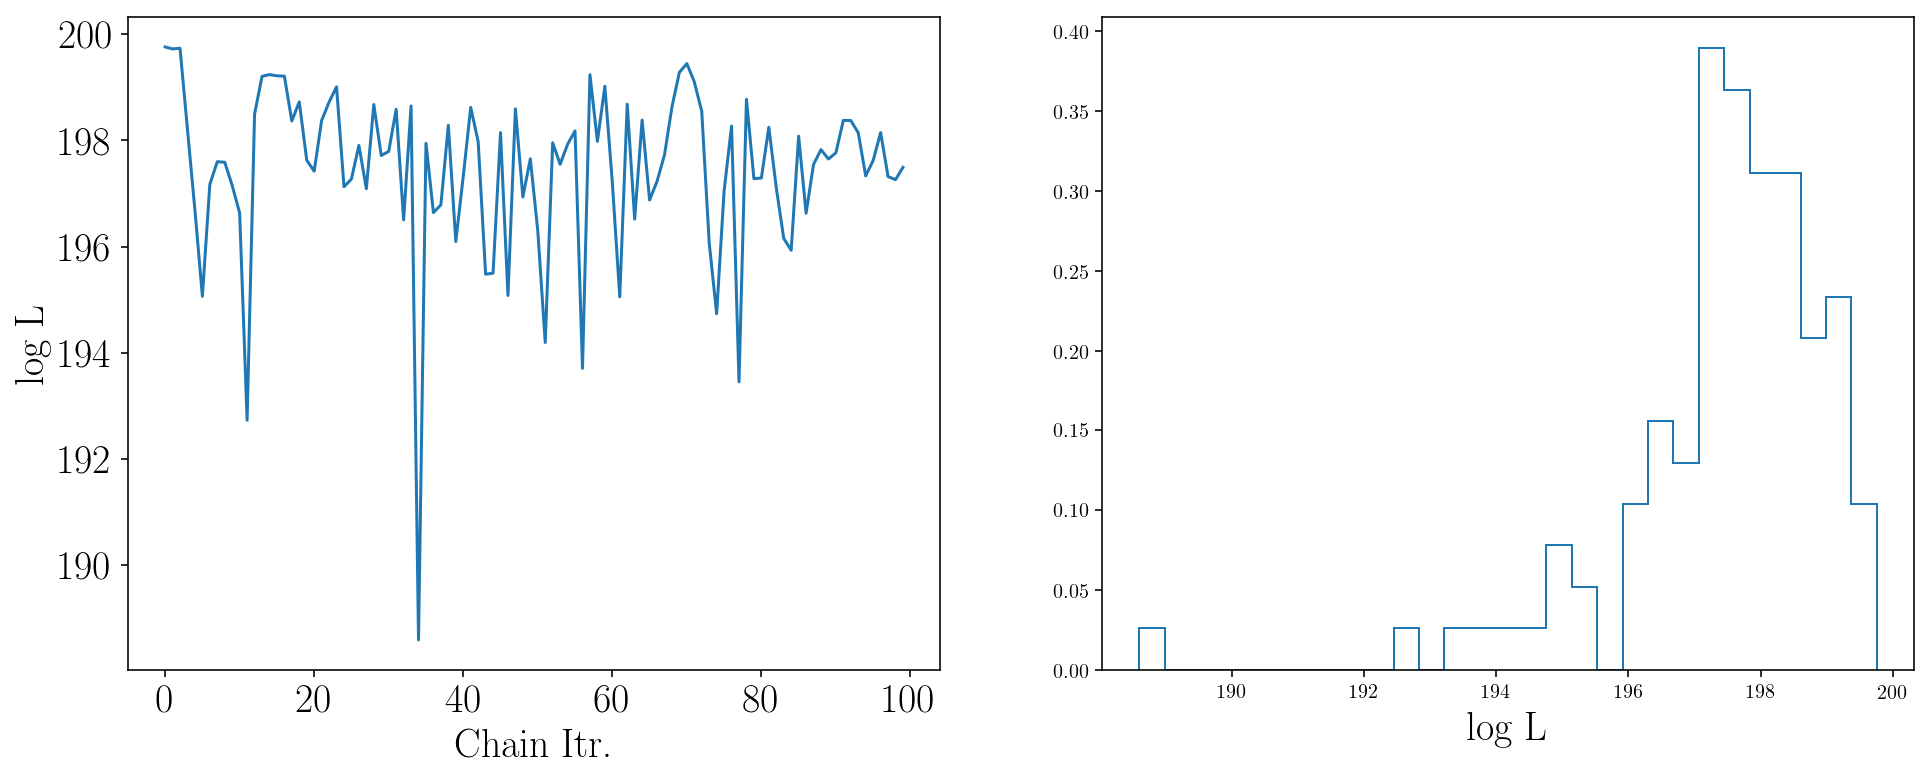

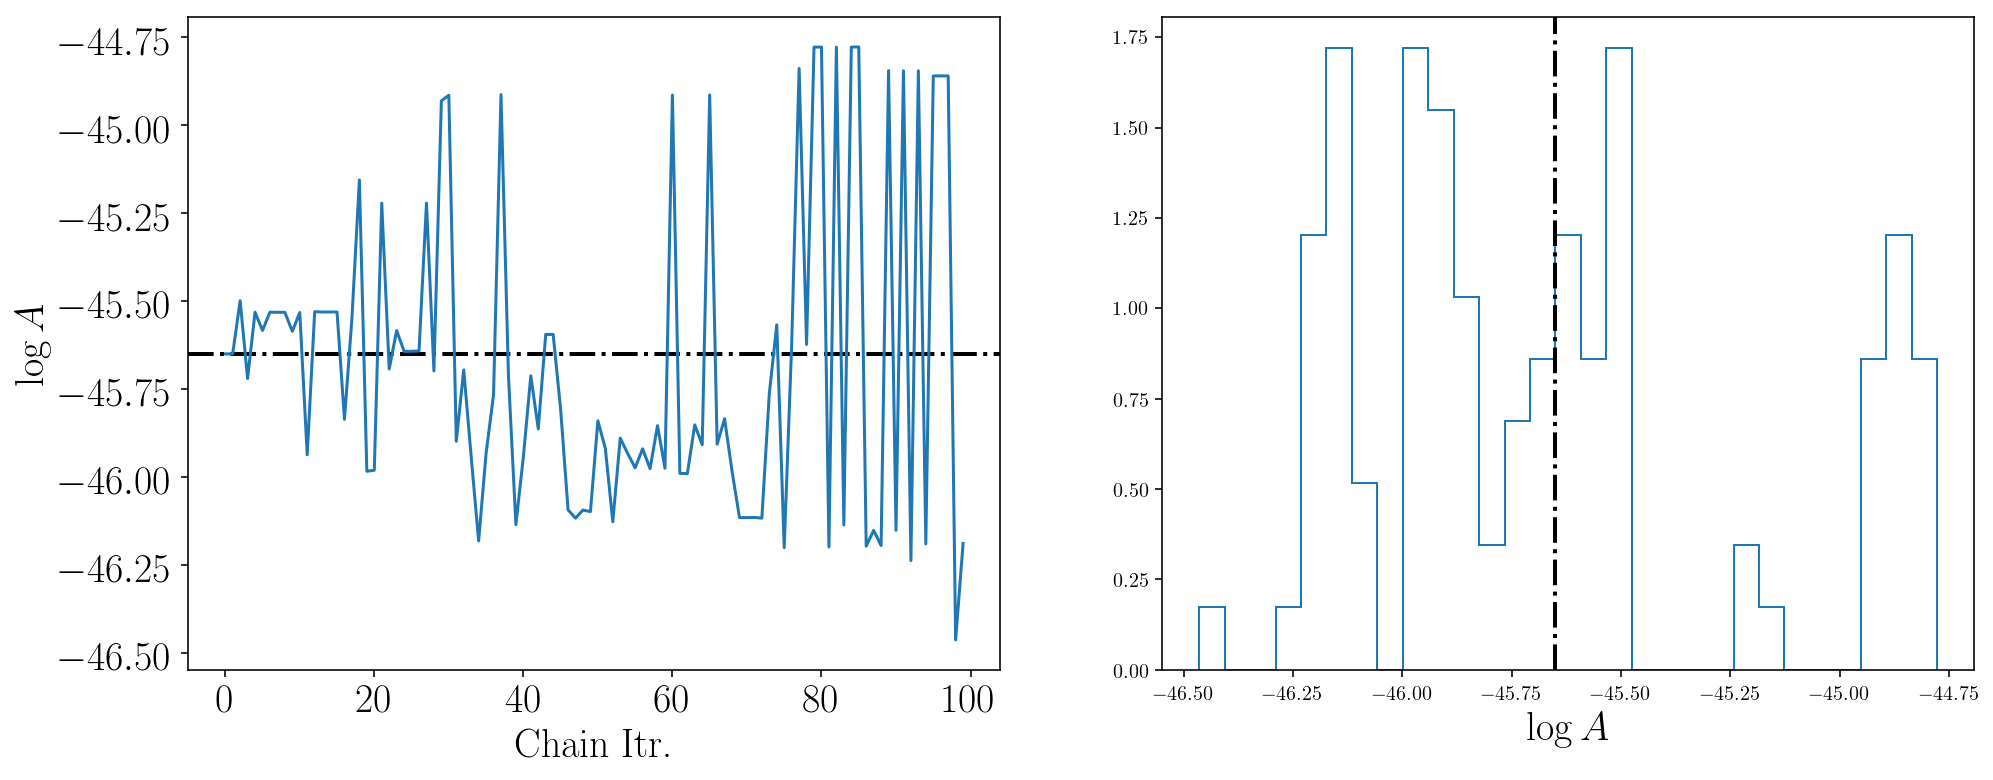

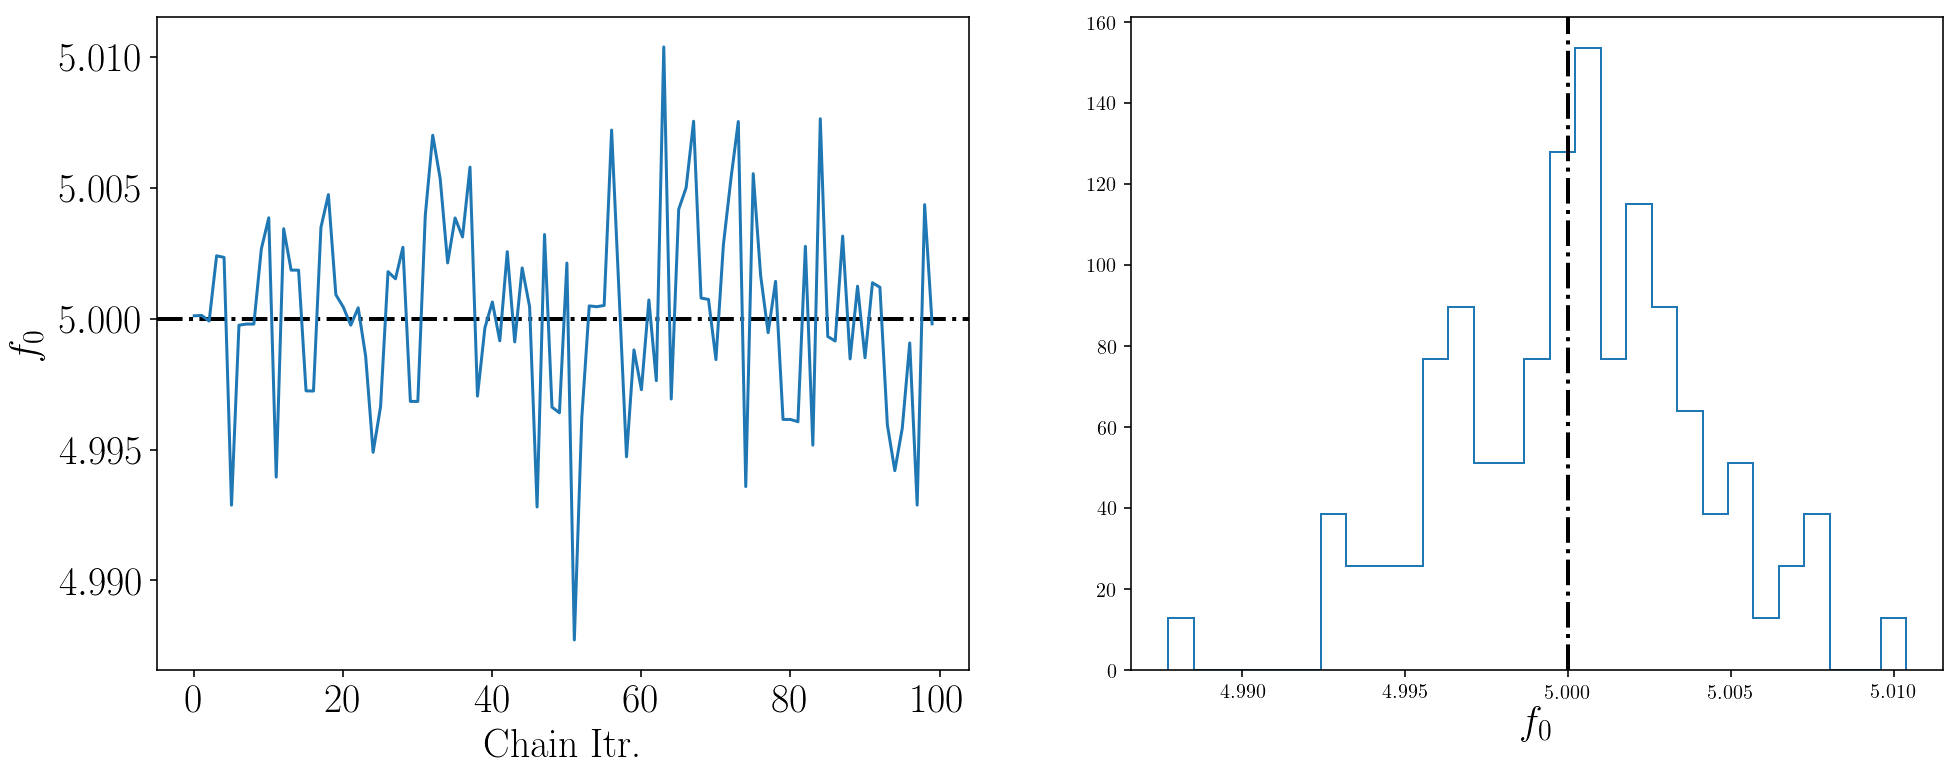

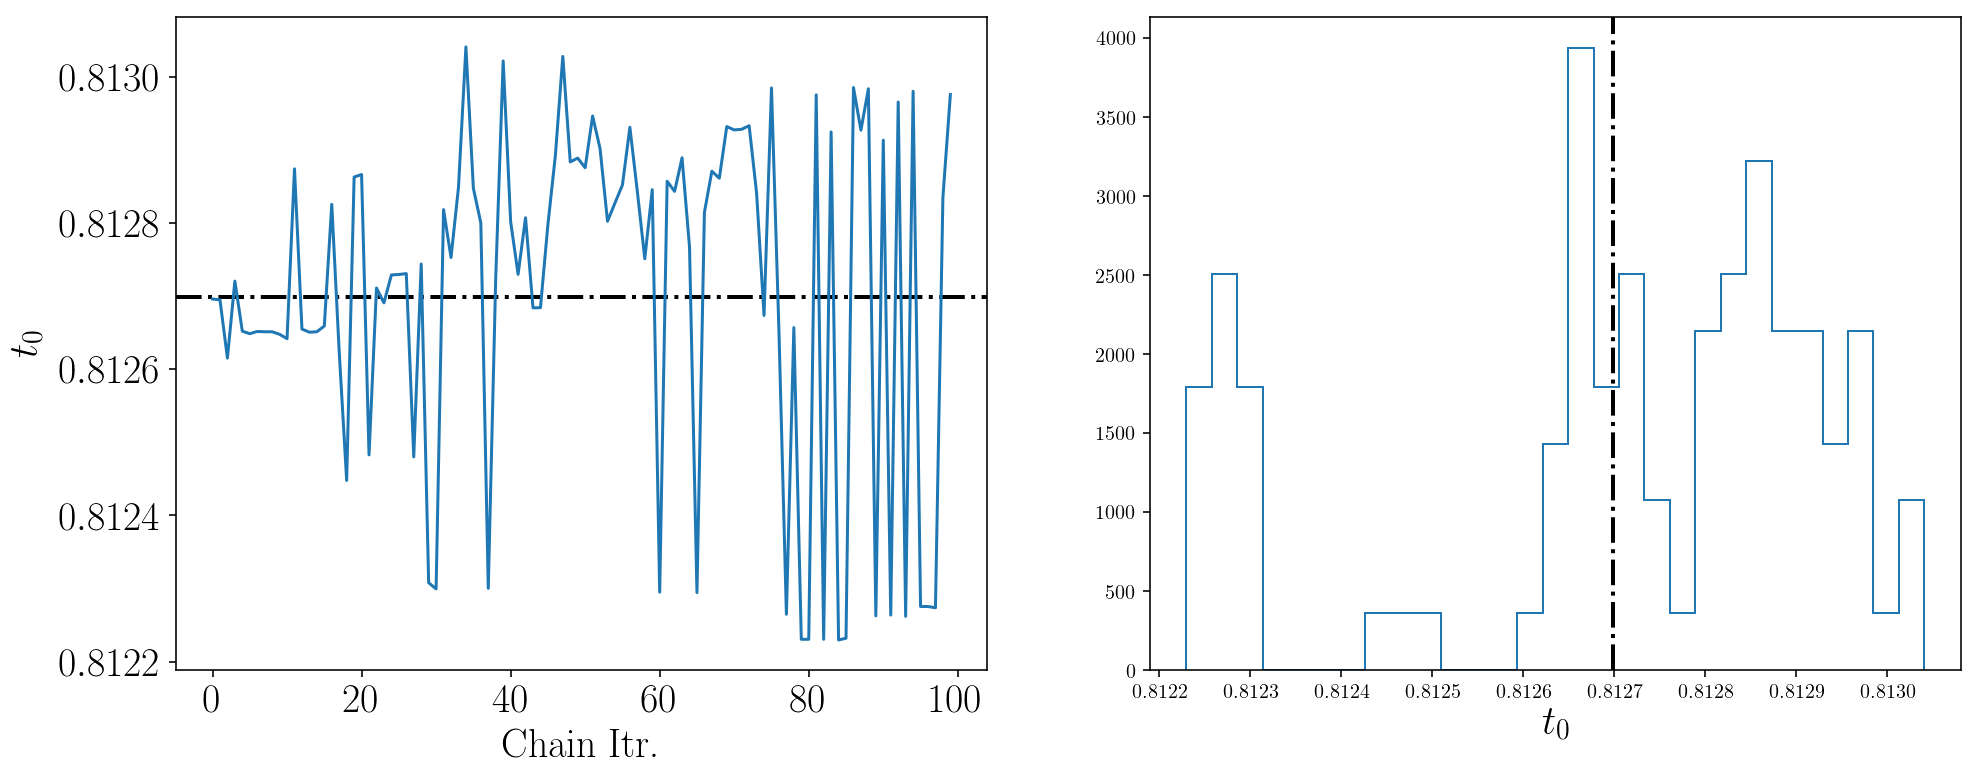

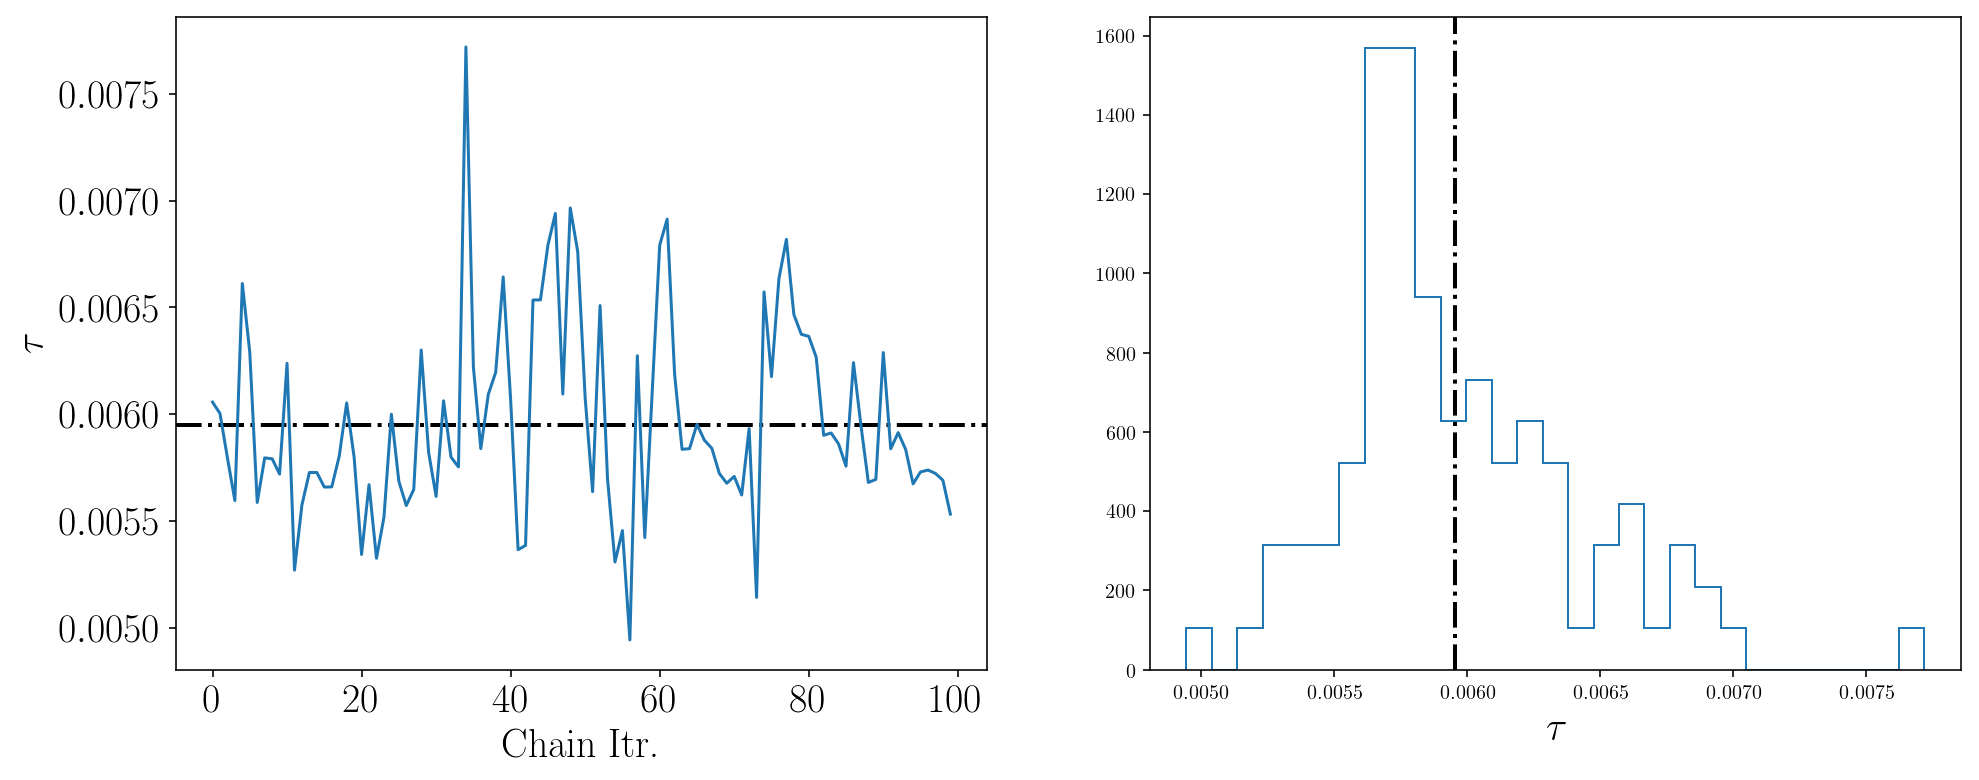

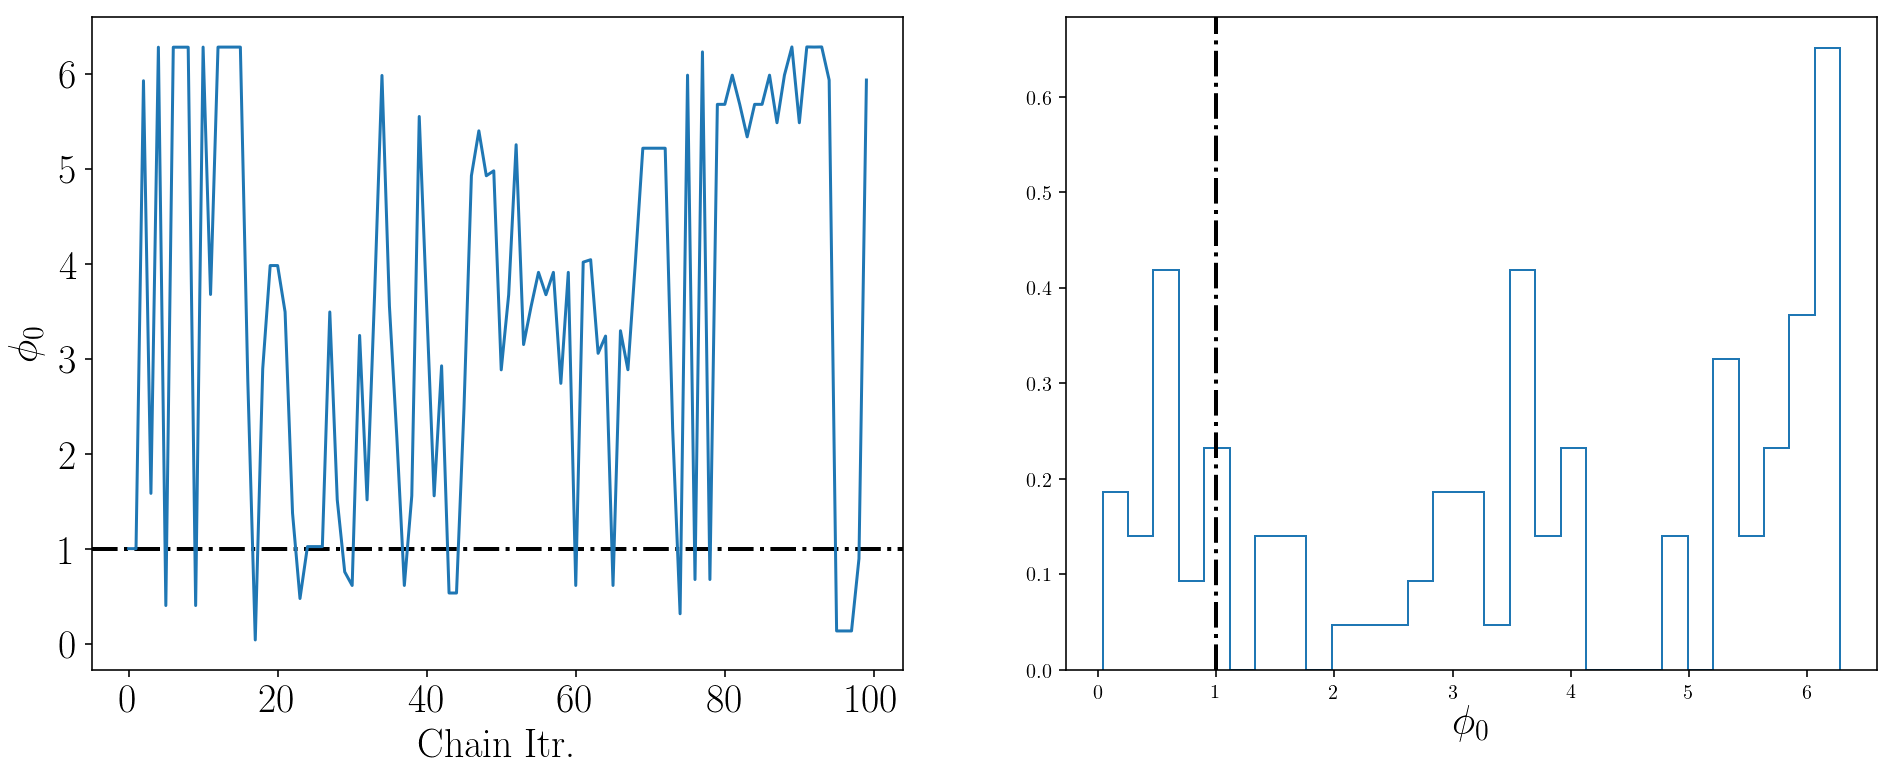

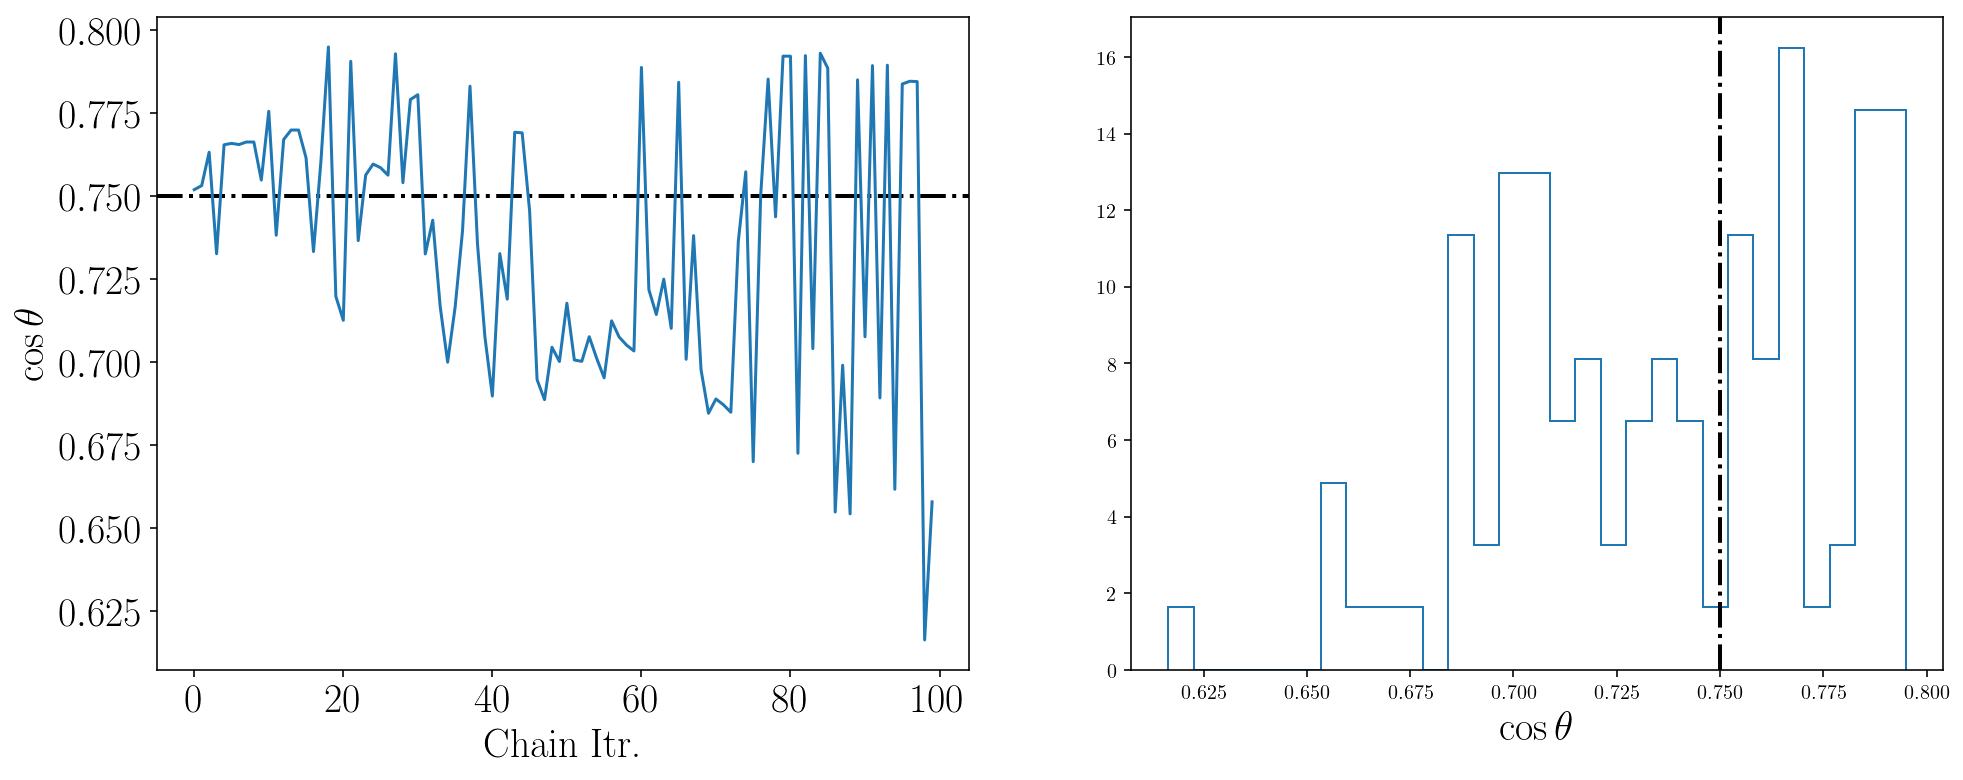

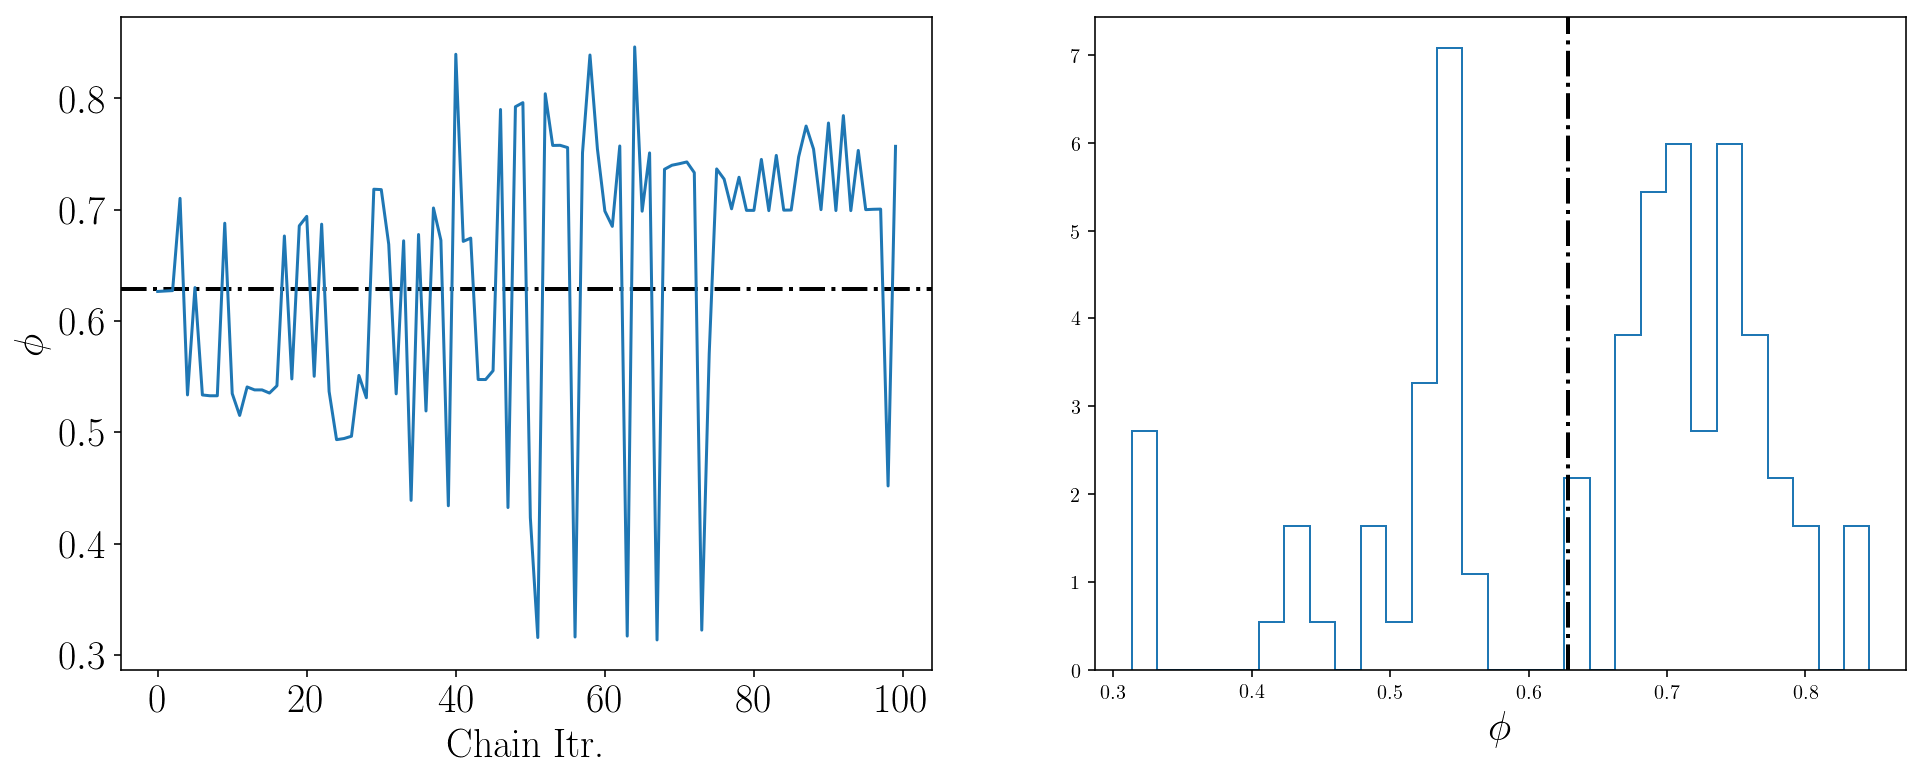

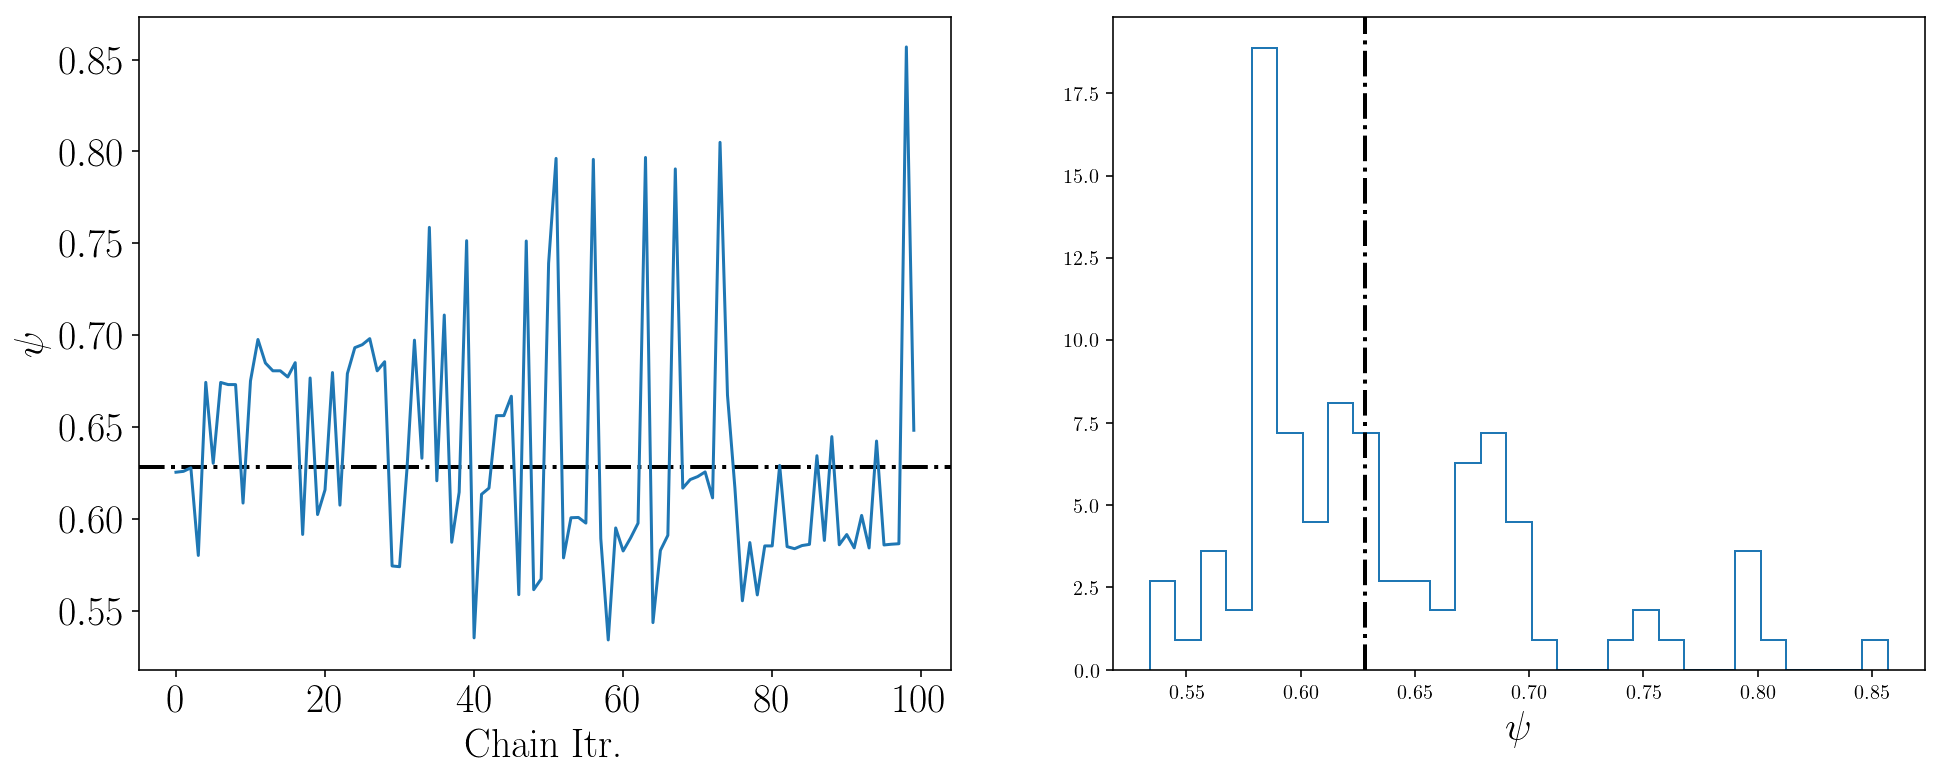

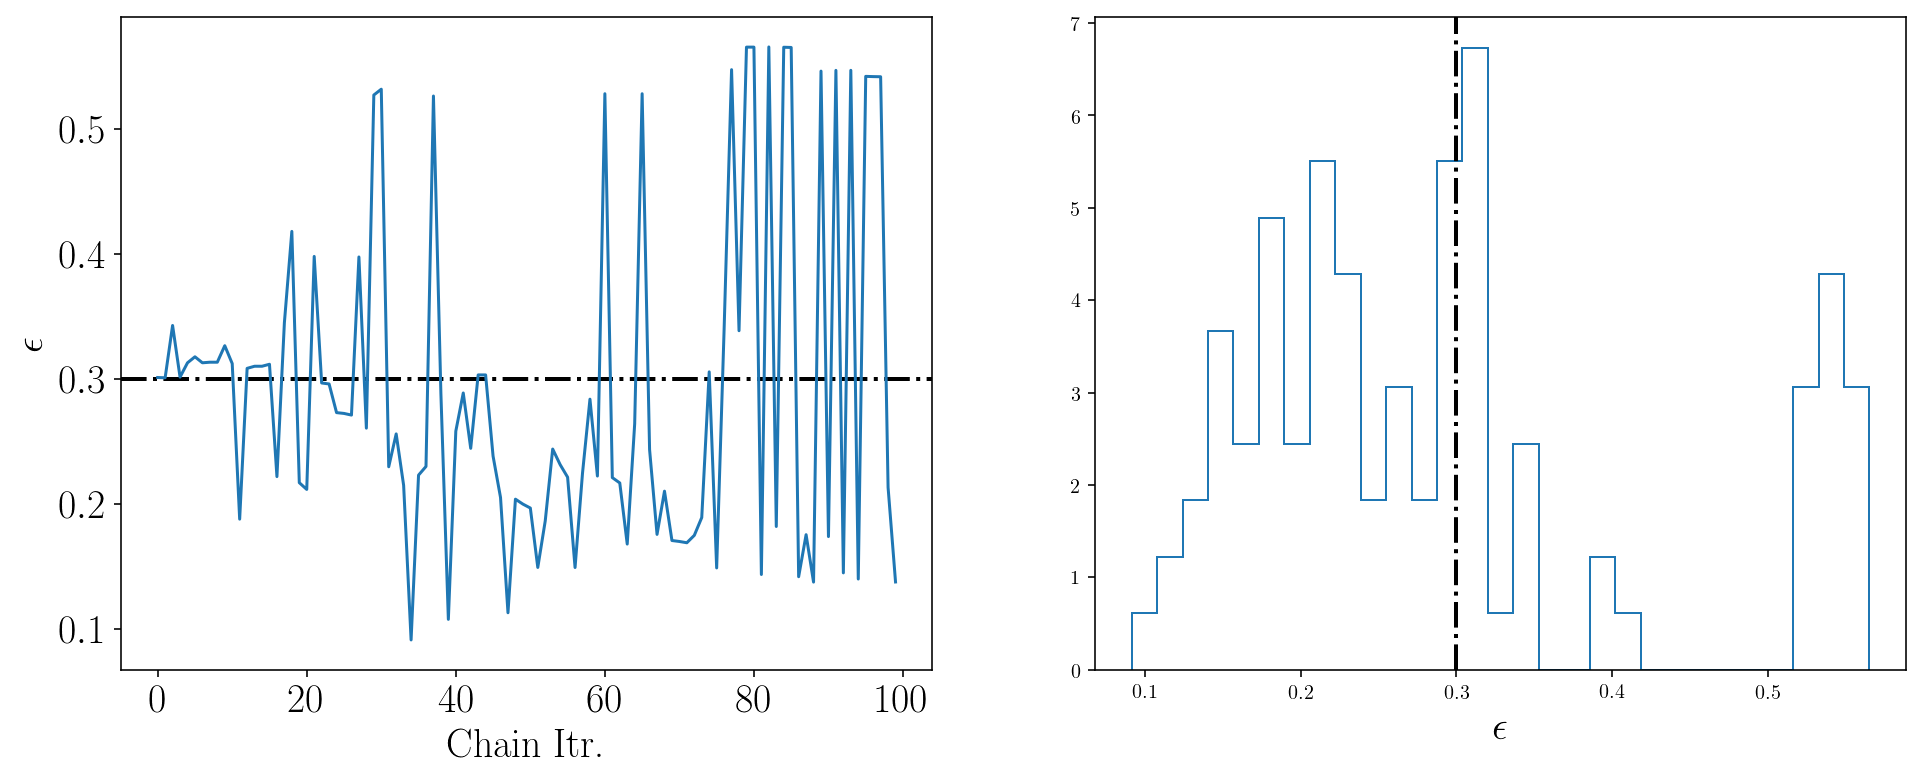

In [11]:
n_bins = 30
mct.plot_chain(lkl[:,0], r'log L', n_bins)
mct.plot_chain(chain[0,:,0], r'$\log A$',   n_bins, np.log(gw.A))
mct.plot_chain(chain[1,:,0], r'$f_{0}$',    n_bins, f0/mHz)
mct.plot_chain(chain[2,:,0], r'$t_{0}$',    n_bins, t0/Week)
mct.plot_chain(chain[3,:,0], r'$\tau$',     n_bins, tau/Week)
mct.plot_chain(chain[4,:,0], r'$\phi_{0}$', n_bins, phi0)

mct.plot_chain(chain[5,:,0], r'$\cos \theta$',   n_bins, np.cos(theta))
mct.plot_chain(chain[6,:,0], r'$\phi$',          n_bins, phi)
mct.plot_chain(chain[7,:,0], r'$\psi$',          n_bins, psi)
mct.plot_chain(chain[8,:,0], r'$\epsilon$',      n_bins, ellip)


In [ ]:
N_samps = len(chain[0,:,0]) # Number of MCMC samples

# Plot the result
#fig, ax = plt.subplots(figsize=(8,6))
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(8,2*6))

#ax[0].set_xlabel(r'f [mHz]', fontsize=20)
ax[1].set_xlabel(r'f [mHz]', fontsize=20)


#ax.set_ylabel(r'$X$', fontsize=16)
ax[0].set_ylabel(r'$\mathcal{R}\left(\tilde{X}\right)$', fontsize=16)
ax[1].set_ylabel(r'$\mathcal{I}\left(\tilde{X}\right)$', fontsize=16)

ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

N = 2046
full_X = np.zeros(N)
mean_X = np.zeros(N)
var_X  = np.zeros(N)
full_t = np.zeros(N)

huh = np.zeros((N,N))

for i in range(N_samps): 
    piece_X = np.zeros(N)
    
    # extract the parameters from the chain
    A     = np.exp(chain[0,i,0])
    f0    = chain[1,i,0]*mHz
    t0    = chain[2,i,0]*Week
    tau   = chain[3,i,0]*Week
    phi0  = chain[4,i,0]

    theta = np.arccos(chain[5,i,0])
    phi   = chain[6,i,0]
    psi   = chain[7,i,0]
    ellip = chain[8,i,0]

    paramsND = np.array([np.log(A), f0/mHz, t0/Week, tau/Week, phi0, \
                                     np.cos(theta), phi, psi, ellip])
    # construct the GW object
    gw = bu.Burst(paramsND, orb)
    gw.construct_detector_tensor()
    gw.calculate_strain()
    gw.TDI = gw.construct_TDI(orb)

    # extract X channels and frequencies of signal
    X = np.fft.irfft(gw.TDI.X).real*2
    t = np.arange(0, Tobs, Tobs/len(X))

    piece_X += X

    full_X = np.vstack((full_X, X))
    full_t = np.vstack((full_t, t))
    
    mean_X += X
    var_X  += X**2
    
    #ax.semilogy(gw.TDI.freqs*1000, np.abs(gw.TDI.X), color='b', alpha=0.3)
    ax[0].plot(gw.TDI.freqs*1000, gw.TDI.X.real, color='g', alpha=0.3)
    ax[1].plot(gw.TDI.freqs*1000, gw.TDI.X.imag, color='g', alpha=0.3)
    
mean_X *= 2/N_samps
var_X  *= 4/N_samps
var_X -= mean_X**2
sig_X = np.sqrt(var_X)

x = full_t.flatten()
y = full_X.flatten()
data = np.vstack((x,y)).T

# plt.imshow(full_X, cmap='hot', interpolation='nearest')
# plt.show()
# mask = (y!=0) & (y>1.0e-20)
# x = x[mask]
# y = y[mask]
# data = np.vstack((x,y)).T

# nbins=20

# k = kde.gaussian_kde(data.T)
# xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Blues)

# ax.plot(t, -mean_X, color='b')
# ax.plot(t, -sig_X, color='b')
# ax.fill_between(t, -mean_X - 1*sig_X, -mean_X + 1*sig_X, color='r', alpha=0.3)
# ax.plot(t, np.fft.irfft(modelX0.Burst.TDI.X).real, color='k')
# plt.xlim(t0 - 3*tau, t0 + 3*tau)  

ax[0].set_xlim(2.975, 3.025)
ax[1].set_xlim(2.975, 3.025)
#ax.plot(modelX0.Burst.TDI.freqs*1000, np.abs(modelX0.Burst.TDI.X), color='k', lw=2)
ax[0].plot(modelX0.Burst.TDI.freqs*1000, modelX0.Burst.TDI.X.real, color='k', lw=2, ls='-.')
ax[1].plot(modelX0.Burst.TDI.freqs*1000, modelX0.Burst.TDI.X.imag, color='k', lw=2, ls='-.')

plt.savefig('../../../Figures/Burst_ReIM_Recovery.pdf', dpi=500, bbox_inches="tight")
plt.show()

In [ ]:
plt.plot(lkl[:,0])
plt.plot(lkl[:,1])
plt.plot(lkl[:,2])
plt.plot(lkl[:,3])
#plt.plot(lkl[:,4])
#plt.plot(lkl[:,5])
plt.plot(lkl[:,10])

plt.show()

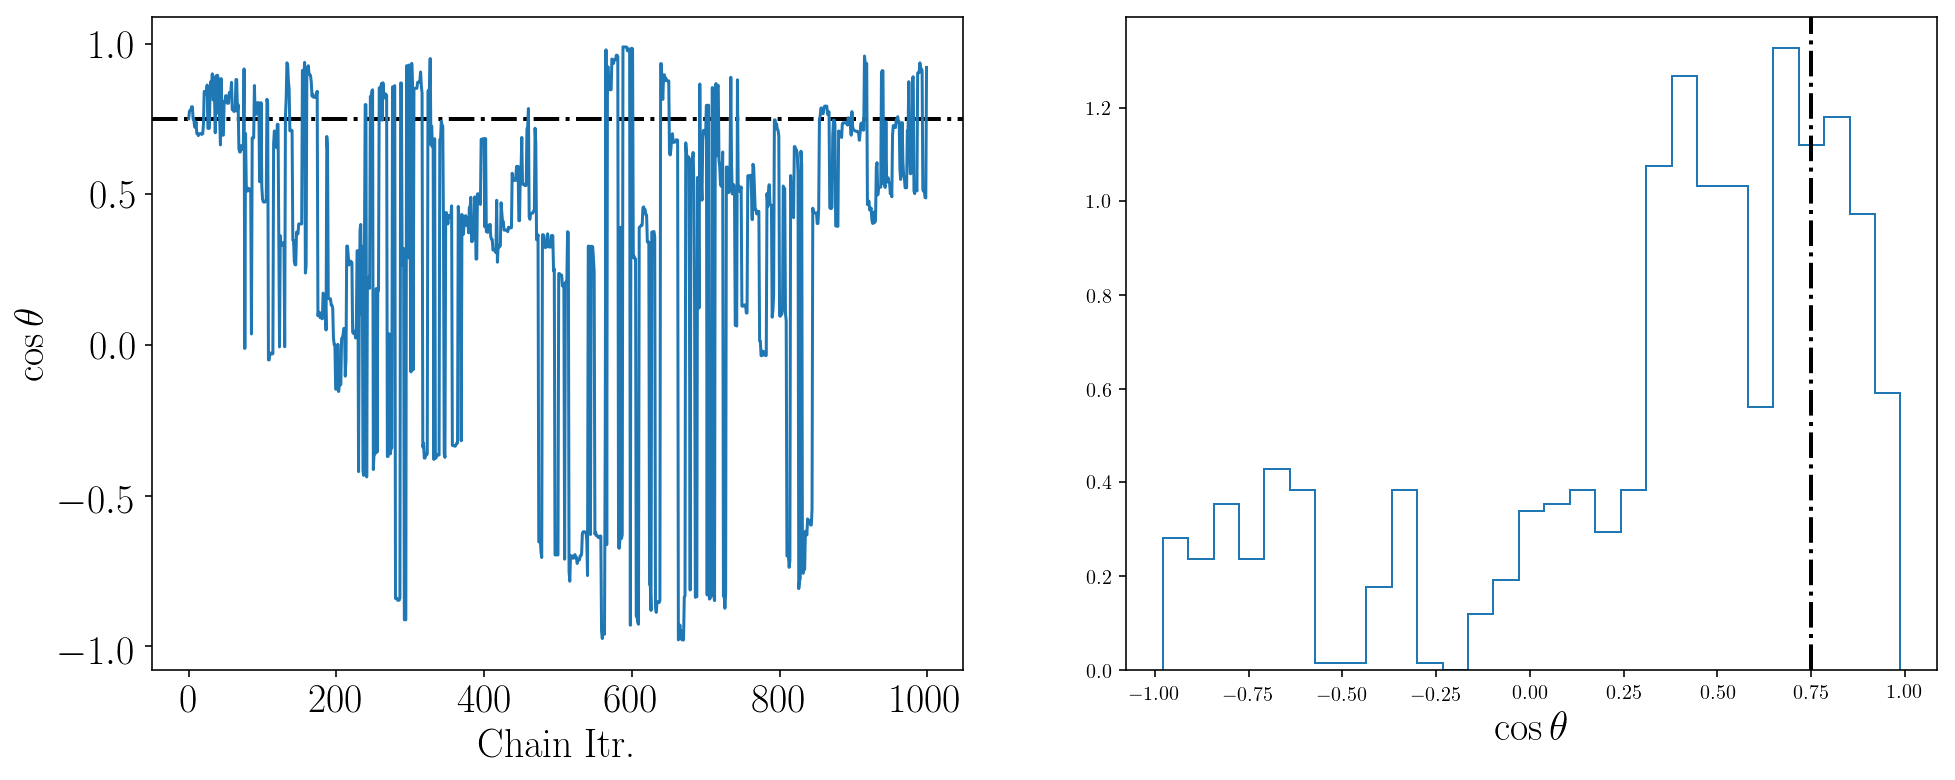

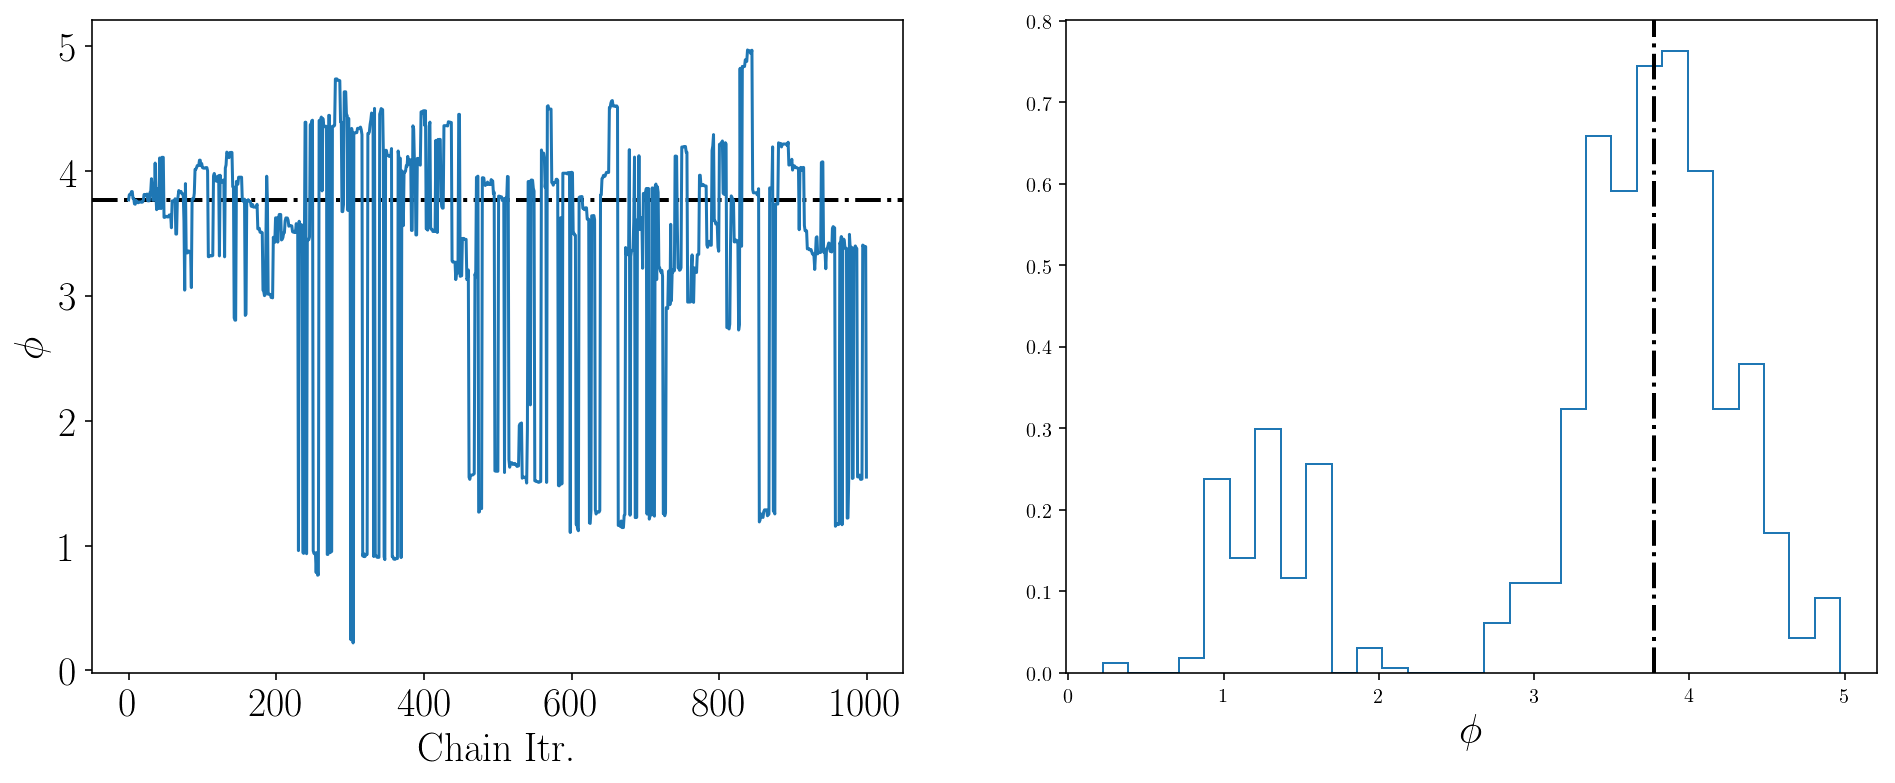

In [21]:
n_bins = 30
T=28
mct.plot_chain(chain[5,:,T], r'$\cos \theta$',   n_bins, np.cos(theta))
mct.plot_chain(chain[6,:,T], r'$\phi$',          n_bins, phi)

In [ ]:
(2.0e-5/(0.040))**10

In [ ]:
f = np.arange(1.0e-4, 40.0e-3, 1/Tobs)
red  = 16.0*( (2.0e-5/f)**10.0 + (1.0e-4/f)**2. )